<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lesson: Linear Regression - Train/Test Split

---

# Introduction

Let's practice train_test_split and k_folds cross validation.


### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.


**Then, we'll try k-folds cross validation.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?


## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. We are predicting a continuous, numeric output (price).

In [14]:
# Regular import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# read in the dataset 
boston = pd.read_csv('../data/boston_data.csv')

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [3]:
# Exploratory data analysis in a function

In [4]:
# EDA Function 
def eda(dataframe):
    print(f"top 2 rows:\n {dataframe.head(2)}\n ")
    print(f"dataframe types: {dataframe.info} \n ")
    print(f"missing values: {dataframe.isnull().sum()} \n")
    print(f"dataframe describe: {dataframe.describe()}")
    
    for item in dataframe:
        print(item)
        print(dataframe[item].value_counts(), '\n')
        
    return None

In [8]:
# Run the EDA function 
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [11]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Using `scikit-learn` Linear Regression

### 2. Feature Selection - pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV 


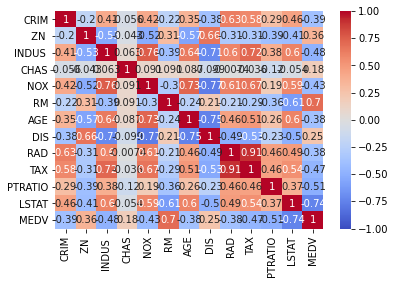

In [18]:
# make the correlation matrix 
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=+1)

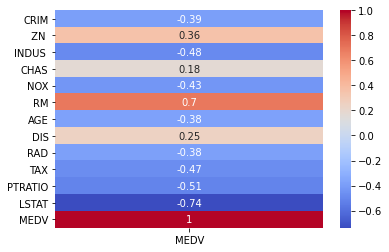

In [21]:
# create it in Seaborn
sns.heatmap(boston.corr()[['MEDV']], 
            cmap='coolwarm', # color pallete
            annot=True); # add the numbers

In [ ]:
# Create X and y with your features

In [30]:
features = ['LSTAT','RM','PTRATIO', 'CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX']

X = boston[features]
y = boston['MEDV']

### 3. Try a 70/30 train/test split (70% of the data for training - 30% for testing)


In [33]:
## make your first train test split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Stolen from Riley

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [37]:
## instantiate your Linear Regression model
lr = LinearRegression()

In [38]:
## fit the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
## score the model
lr.score(X_train, y_train)

0.7339416954791522

### 4. Make a function that accepts X, y, and a float for the % of the data you want to use for training in train_test_split. The function should instantiate, fit, and score the model. Return the score. 

In [94]:
def tts(X,y,train_percent):
    # 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_percent, random_state=42)
    # Instantiate Regression
    lr = LinearRegression()
    # Fit on training data
    lr.fit(X_train, y_train)
    # Score on test data
    score = lr.score(X_test, y_test)
    # return the score
    return score

In [95]:
## Call your model to test it

In [96]:
tts(X,y,0.30)

0.7031110844827613

### 5. K-folds cross validation is a safer way to check performance than a single train_test_split. 

Recall that k-fold cross-validation creates a hold-out portion of your dataset for each iteration:

![](http://i.imgur.com/0PFrPXJ.png)

Update: (now k is 5 by default)

#### Perform k-folds cross validation, varying the number of folds from 5 through 10. Which number of folds scores best?

In [97]:
lr = LinearRegression()
my_scores = [cross_val_score(lr, X, y, cv = i).mean() for i in range(5, 11)]
my_scores



[0.3755530950280209,
 0.3808463854740049,
 0.41933215444144245,
 0.3169399434569733,
 0.357992055292609,
 0.1424436390451306]

In [100]:
list_scores = []
for i in range(5, 11):
    my_score = cross_val_score(lr, X, y, cv = i).mean()
    list_scores.append(my_score)
list_scores

[0.3755530950280209,
 0.3808463854740049,
 0.41933215444144245,
 0.3169399434569733,
 0.357992055292609,
 0.1424436390451306]

Which makes you feel more confident about your model performance - TTS or cross validation? Why?